# Proyecto 3

## Aprendizaje Colaborativo Internacional en Línea

Esta tarea se encuentra en el marco de la aplicación del programa de Aprendizaje Colaborativo Internacional en Línea (COIL – siglas en inglés de “Collaborative Online International Learning”) de la Asociación de Universidades Confiadas a la Compañía de Jesús en América Latina (AUSJAL).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Países: 

México, India, Canadá, Uruguay

### Categoría de Dominio: 

Indicadores económicos y financieros que incluyen márgenes de utilidad, productividad, innovación, sostenibilidad, empleo, e inversión.

### Pregunta: 

¿Cómo influye la tasa de desempleo en el crecimiento del PIB en India?

### Fuentes:

[Global Economic Indicators Dataset](https://www.kaggle.com/datasets/heidarmirhajisadati/global-economic-indicators-dataset-2010-2023?resource=download)


In [3]:
world = pd.read_csv("Data/wordl_economic_ind new.csv")
world

,Country Name,Country Code,Year,"Personal remittances, received (% of GDP)","Unemployment, total (% of total labor force)",GDP (current US$)_x,GDP growth (annual %)_x,GDP (current US$)_y,GDP growth (annual %)_y
0,Aruba,ABW,1960,436.255.272,7.333.335.829,21125015452,25.487.926,21125015452,25.487.926
1,Africa Eastern and Southern,AFE,1960,107.831.376,8.121,537777811.1,1.854.871.684,537777811.1,1.854.871.684
2,Afghanistan,AFG,1960,36.119.336,4.224.595.137,10447637853,5.427.842.876,10447637853,5.427.842.876
3,Africa Western and Central,AFW,1960,1.689.666.804,4.489,18606562979,2.482.656.077,18606562979,2.482.656.077
4,Angola,AGO,1960,4.338.415.406,10.307,6592693841,5.537.979.317,6592693841,5.537.979.317
...,...,...,...,...,...,...,...,...,...
16753,Kosovo,XKX,2022,0,0,0,0,0,0
16754,"Yemen, Rep.",YEM,2022,0,0,0,0,0,0
16755,South Africa,ZAF,2022,0,0,0,0,0,0
16756,Zambia,ZMB,2022,0,0,0,0,0,0


In [4]:
df = world[['Country Name', 'Year', 'GDP growth (annual %)_x', 'Unemployment, total (% of total labor force)']]
df


,Country Name,Year,GDP growth (annual %)_x,"Unemployment, total (% of total labor force)"
0,Aruba,1960,25.487.926,7.333.335.829
1,Africa Eastern and Southern,1960,1.854.871.684,8.121
2,Afghanistan,1960,5.427.842.876,4.224.595.137
3,Africa Western and Central,1960,2.482.656.077,4.489
4,Angola,1960,5.537.979.317,10.307
...,...,...,...,...
16753,Kosovo,2022,0,0
16754,"Yemen, Rep.",2022,0,0
16755,South Africa,2022,0,0
16756,Zambia,2022,0,0


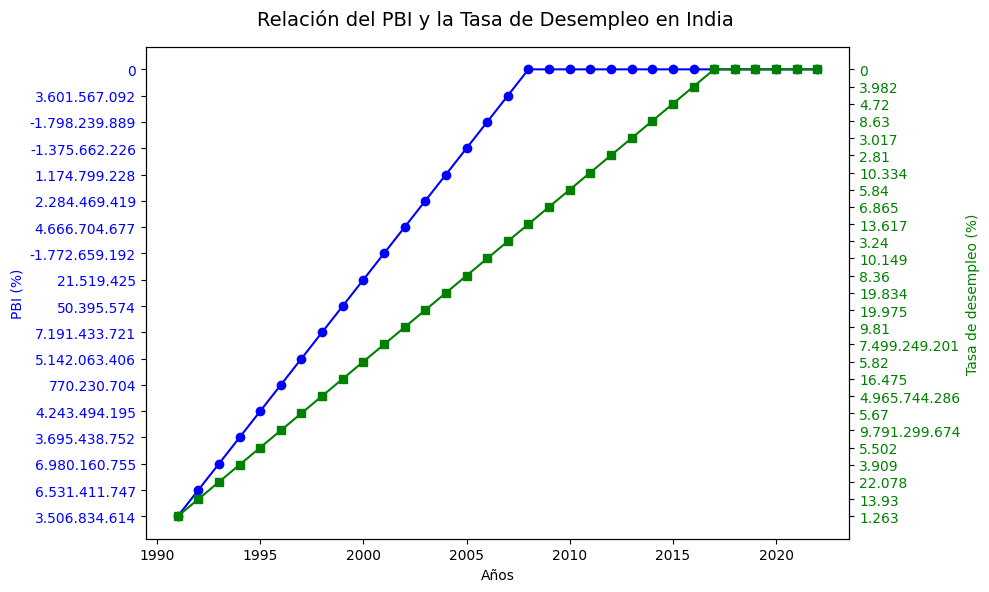

In [9]:


import matplotlib.pyplot as plt

# Filtrar datos para India y años mayores a 1990
india_df = df[df['Country Name'] == 'India']
years_pbi = india_df[india_df['Year'] > 1990]
years_unemployment = india_df[india_df['Year'] > 1990]

# Seleccionar columnas relevantes
pbi = years_pbi['GDP growth (annual %)_x']
unemployment = years_unemployment['Unemployment, total (% of total labor force)']
years = years_pbi['Year']  # Asegurarse de usar la misma escala de años para ambos gráficos

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar el PBI en el eje izquierdo
ax1.set_xlabel('Años')
ax1.set_ylabel('PBI (%)', color='blue')
ax1.plot(years, pbi, label="Crecimiento del PBI en India", color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Graficar la tasa de desempleo en el eje derecho
ax2 = ax1.twinx()
ax2.set_ylabel('Tasa de desempleo (%)', color='green')
ax2.plot(years, unemployment, label="Desempleo en India", color='green', marker='s')
ax2.tick_params(axis='y', labelcolor='green')

# Título y ajustes finales
fig.suptitle('Relación del PBI y la Tasa de Desempleo en India', fontsize=14)
fig.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregar líneas guía en el eje x para claridad
plt.show()





















(          Date Country  GDP Growth Rate (%)  Unemployment Rate (%)
 14  2010-05-31   India                 4.08                  10.40
 22  2010-08-31   India                 8.04                   3.26
 23  2010-08-31   India                 9.14                   8.14
 33  2011-01-31   India                 7.33                   8.56
 42  2011-03-31   India                 4.83                  11.78,
 (56, 4))